# scRNA-seq analysis of mouse embryonic pancreas data

Data described in Bastidas-Ponce, Tritschler et al., Development, 2019, doi:10.1242/dev.173849  
Processed and annotated data was downloaded from GEO with accession number `GSE132188`.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scanpy as sc
import pandas as pd
import seaborn as sns
import xlsxwriter
sc.settings.verbosity = 3
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.0 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
sc.set_figure_params(vector_friendly=True, color_map='viridis', dpi_save=300, transparent=True)

In [3]:
sc.settings.figdir='./figures'

## Load data

In [7]:
adata = sc.read('./data/GSE132188_adata.h5ad.h5')

## Endocrine lineage

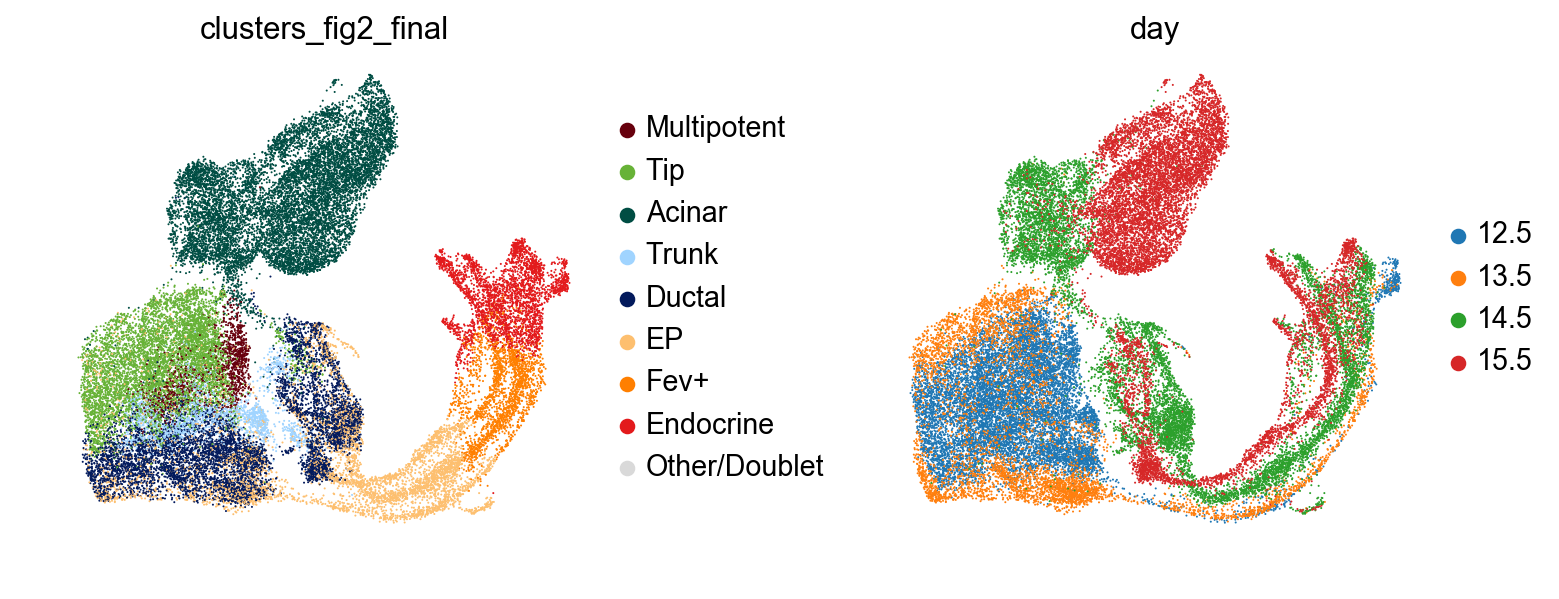

In [8]:
sc.pl.umap(adata, color=['clusters_fig2_final','day'], wspace=0.4,frameon=False)

In [9]:
adata.obs['clusters_fig2_final'].cat.remove_unused_categories(inplace=True)

### Gene expression

#### Figure 1

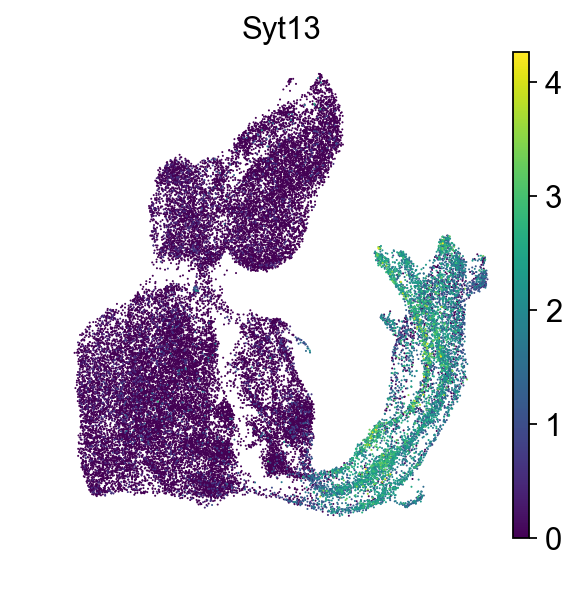

In [7]:
sc.pl.umap(adata, color=['Syt13'] ,wspace=0.4, frameon=False)

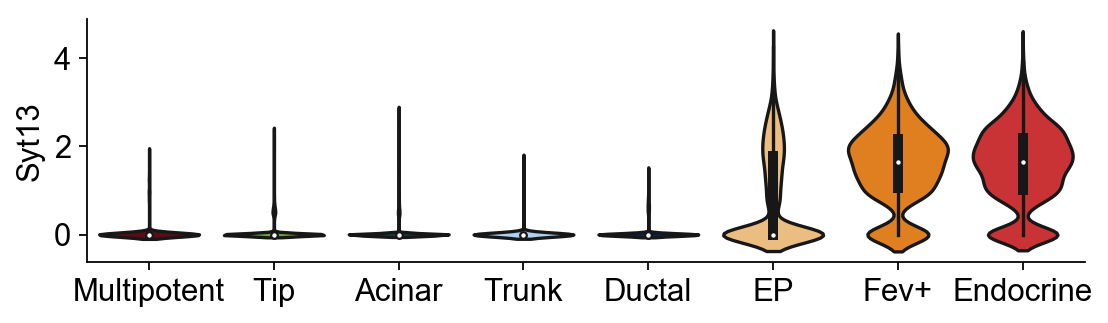

In [8]:
gene='Syt13'

df = adata.obs[['clusters_fig2_final']].copy()
df[gene] = adata[:, gene].to_df()
fig,ax = pl.subplots(figsize=(8,2))
ax=sns.violinplot(x='clusters_fig2_final', y=gene, palette=adata.uns['clusters_fig2_final_colors'], data=df, 
                  inner='box', scale='width', linewidth=1.5, legend=False)

pl.xticks(rotation=0)
pl.xlabel('')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

filename='./figures/Fig_1c.pdf'
pl.savefig(filename, dpi=300, format='pdf')
pl.show()
sc.set_figure_params(vector_friendly=True, color_map='viridis', dpi_save=300, transparent=True)

#### Figure S1 - Syt family members

In [9]:
# subset to endocrine lineage
adata_sub = adata[np.isin(adata.obs['clusters_fig2_final'],['Ductal', 'EP', 'Fev+', 'Endocrine'])].copy()

In [11]:
[k for k in adata_sub.var_names if k.startswith('Syt')]

['Syt2',
 'Syt14',
 'Syt13',
 'Sytl5',
 'Sytl4',
 'Syt11',
 'Syt6',
 'Sytl1',
 'Syt5',
 'Syt3',
 'Sytl2',
 'Syt9',
 'Syt17',
 'Syt8',
 'Syt1',
 'Syt15',
 'Syt16',
 'Sytl3',
 'Syt4',
 'Syt12',
 'Syt7']

In [12]:
syt_family = ['Syt1', 'Syt2', 'Syt3', 'Syt4', 'Syt5', 'Syt6', 'Syt7', 'Syt8', 'Syt9', 
              'Syt11', 'Syt12', 'Syt13', 'Syt14', 'Syt15', 'Syt16', 'Syt17']

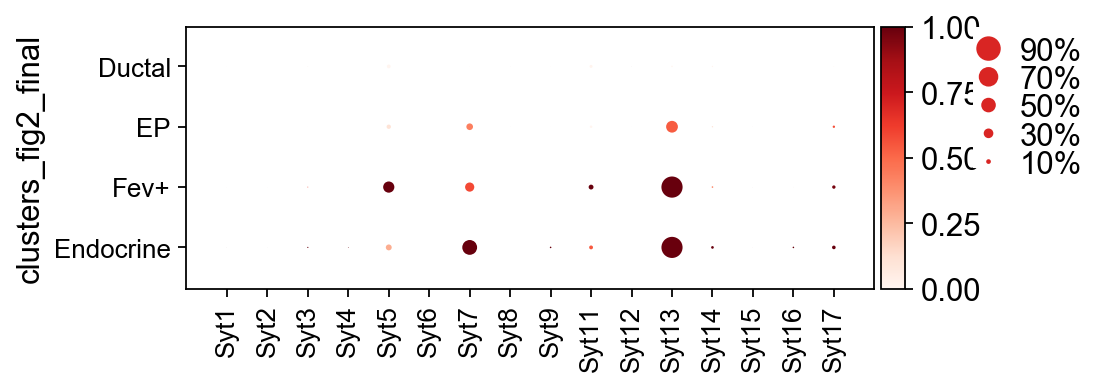

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[5.6, 0, 0.2, 0.5, 0.25])

In [13]:
sc.pl.dotplot(adata_sub, groupby='clusters_fig2_final', var_names=syt_family, standard_scale='var', save='_Fig_S1a.pdf')

#### Figure S9 - integrins

In [20]:
#adata_sub = adata[np.isin(adata.obs['clusters_fig2_final'],['Trunk', 'Ductal','EP', 'Fev+', 'Endocrine'])].copy()

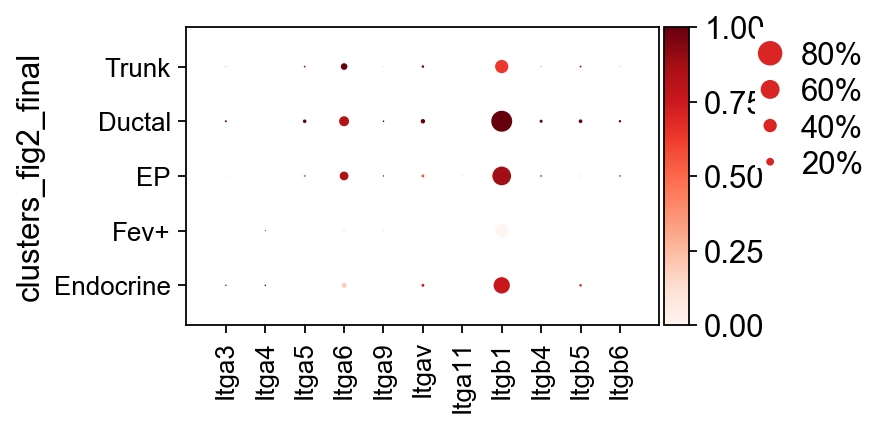

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[3.8499999999999996, 0, 0.2, 0.5, 0.25])

In [22]:
genes = ['Itga3', 'Itga4', 'Itga5', 'Itga6', 'Itga9', 'Itgav', 'Itga11', 'Itgb1', 'Itgb4', 'Itgb5', 'Itgb6']
sc.pl.dotplot(adata_sub, groupby='clusters_fig2_final', var_names=genes, standard_scale='var', save='_Fig_7d.pdf')

#### Figure S8

In [11]:
adata_sub = adata[np.isin(adata.obs['clusters_fig2_final'],['Trunk', 'Ductal','EP', 'Fev+', 'Endocrine'])].copy()

In [20]:
adata_sub.obs['clusters_fig3_broad'] = adata_sub.obs['clusters_fig3_final'].tolist()
adata_sub.obs.clusters_fig3_broad.replace({
    'Prlf. Trunk': 'Trunk', 
    'Prlf. Ductal': 'Ductal'}, inplace=True)

... storing 'clusters_fig3_broad' as categorical


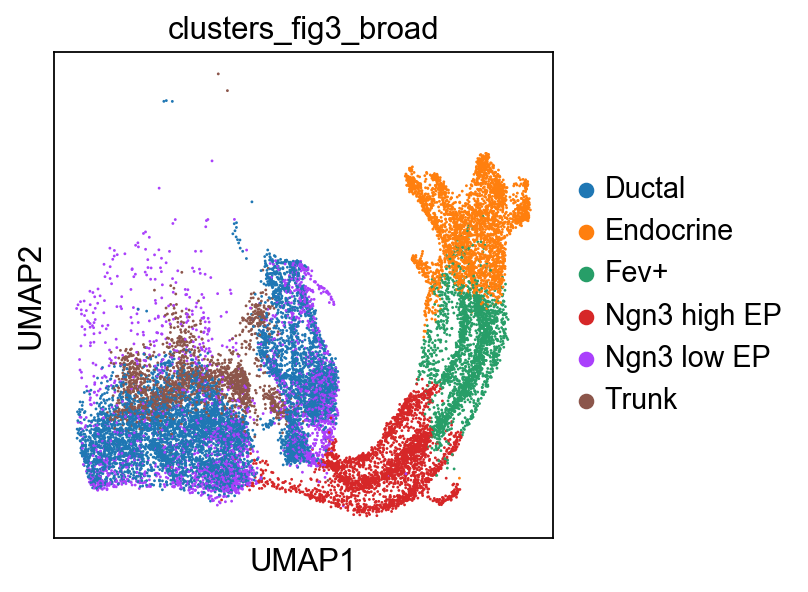

In [21]:
sc.pl.umap(adata_sub, color=['clusters_fig3_broad'])

In [34]:
adata_sub.obs.clusters_fig3_broad.cat.reorder_categories(['Trunk', 'Ductal', 'Ngn3 low EP', 'Ngn3 high EP', 'Fev+', 'Endocrine'], inplace=True)

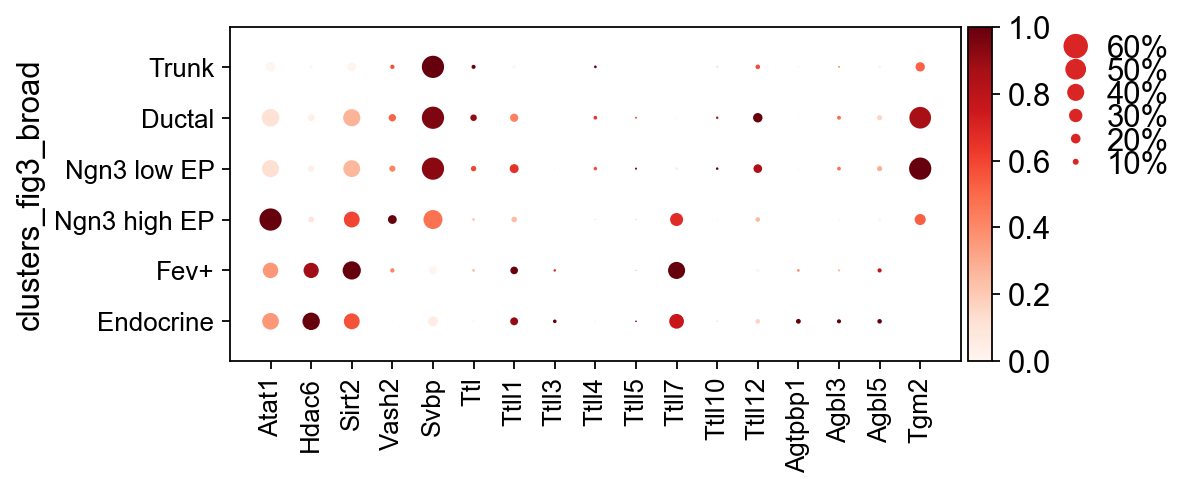

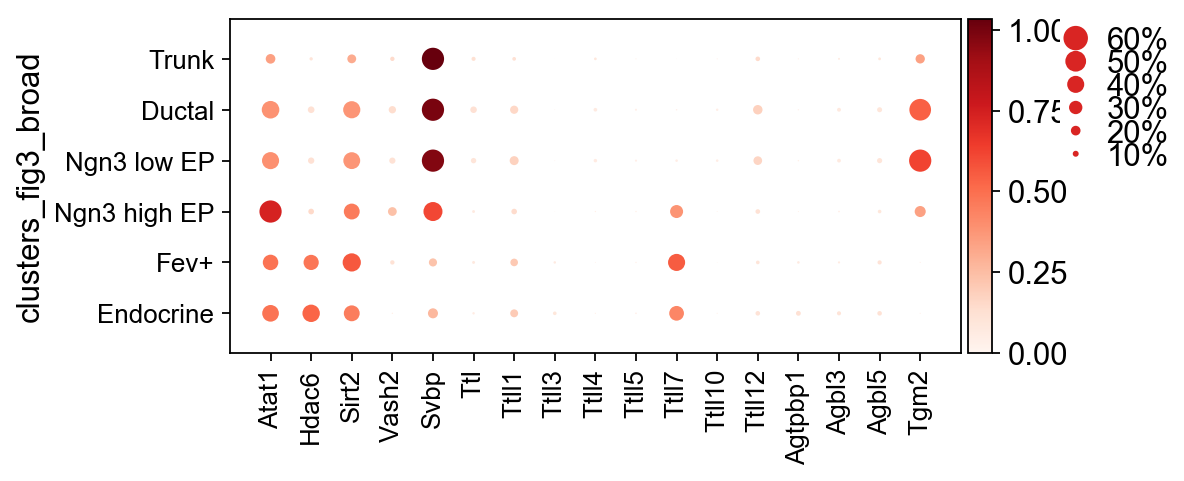

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[5.949999999999999, 0, 0.2, 0.5, 0.25])

In [35]:
genes = ['Atat1', 'Hdac6', 'Sirt2', 'Vash2', 'Svbp', 'Ttl', 'Ttll1', 'Ttll3', 'Ttll4', 
         'Ttll5', 'Ttll7', 'Ttll10', 'Ttll12', 'Agtpbp1', 'Agbl3', 'Agbl5', 'Tgm2']
sc.pl.dotplot(adata_sub, groupby='clusters_fig3_broad', var_names=genes, standard_scale='var', save='figure1_revision_scaled.pdf', dot_max=0.6)
sc.pl.dotplot(adata_sub, groupby='clusters_fig3_broad', var_names=genes, vmin=0, save='figure1_revision.pdf', dot_max=0.6)

#### Figure 5

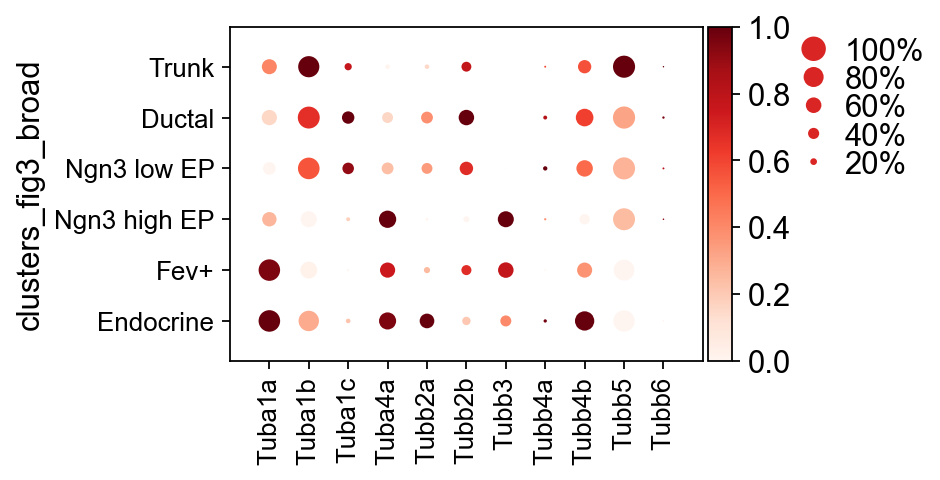

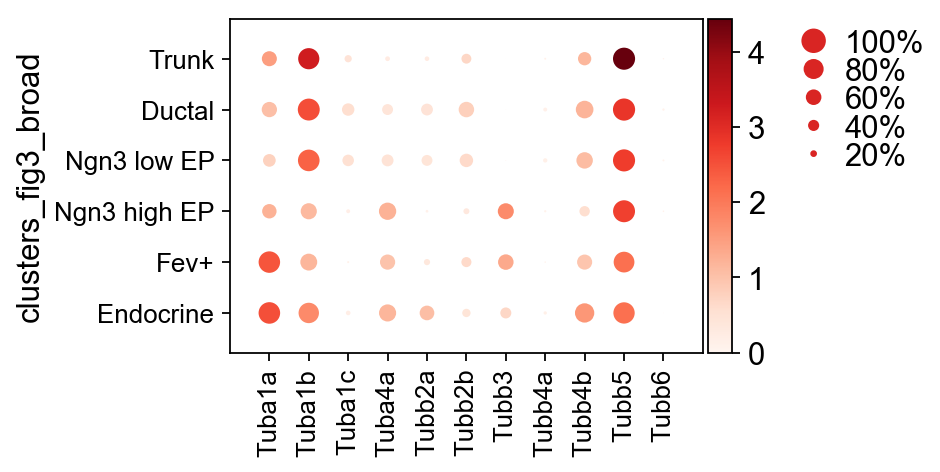

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[3.8499999999999996, 0, 0.2, 0.5, 0.25])

In [36]:
genes = ['Tuba1a', 'Tuba1b', 'Tuba1c', 'Tuba4a', 'Tubb2a', 'Tubb2b', 'Tubb3', 'Tubb4a', 'Tubb4b', 'Tubb5', 'Tubb6']

sc.pl.dotplot(adata_sub, groupby='clusters_fig3_broad', var_names=genes, standard_scale='var', save='figure2_revision_scaled.pdf')
sc.pl.dotplot(adata_sub, groupby='clusters_fig3_broad', var_names=genes, vmin=0, save='figure2_revision.pdf')

## Endocrine precursors EPs

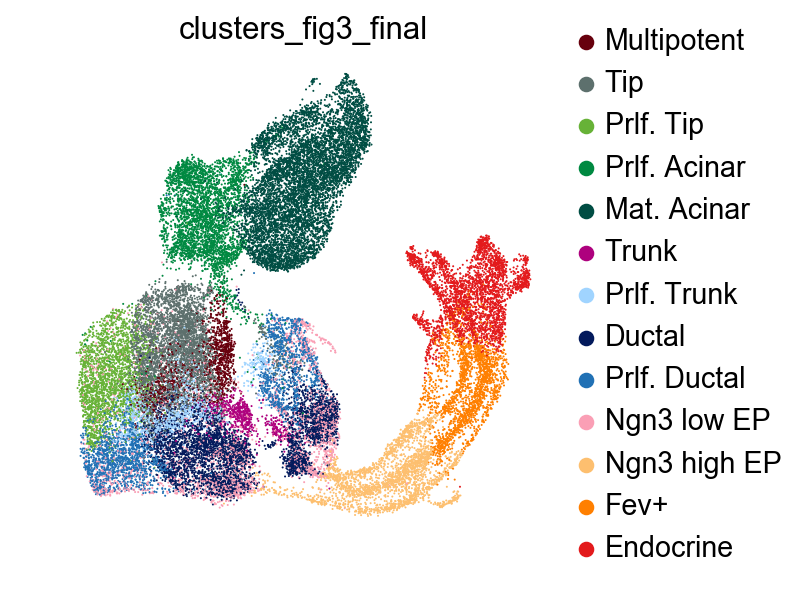

In [32]:
sc.pl.umap(adata, color=['clusters_fig3_final'], wspace=0.4,frameon=False)

### Syt13 EPs - manifold and Syt13 gate

In [33]:
adata_ep_all = adata[np.isin(adata.obs['clusters_fig3_final'],['Ngn3 high EP'])].copy()

### Figure 2a

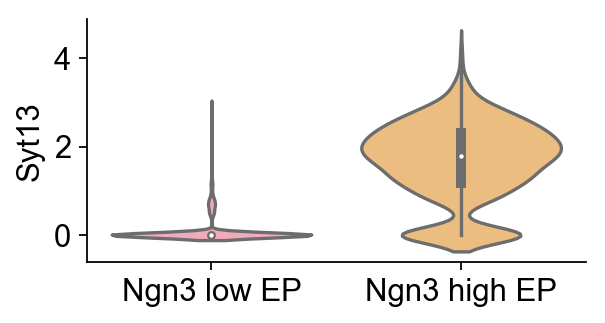

In [35]:
gene='Syt13'

adata_sub=adata[np.isin(adata.obs['clusters_fig3_final'],['Ngn3 low EP','Ngn3 high EP'])].copy()
df = adata_sub.obs[['clusters_fig3_final']].copy()
df[gene] = adata_sub[:, gene].to_df()

fig,ax = pl.subplots(figsize=(4,2))
ax=sns.violinplot(x='clusters_fig3_final', y=gene, palette=['#fa9fb5', '#fdbf6f'], data=df, inner='box', scale='width', linewidth=1.5, legend=False)
pl.xticks(rotation=0)
pl.xlabel('')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

filename='./figures/Fig_2a.pdf'
pl.savefig(filename, dpi=300, format='pdf')
pl.show()

### Figure 2b

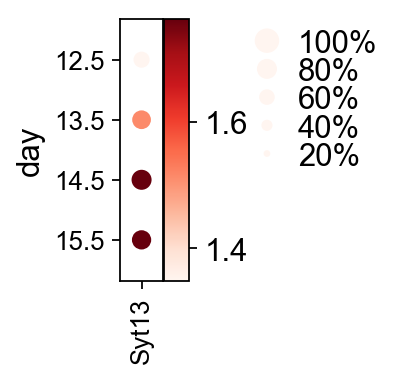

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.35, 0, 0.2, 0.5, 0.25])

In [36]:
sc.pl.dotplot(adata_ep_all, groupby='day', var_names=['Syt13'], save='_Fig_2b.pdf')

### Syt13 high vs low

In [39]:
adata_ep_all.obs['Syt13_gate']=['low' if k<=1 else 'high' for k in adata_ep_all[:,'Syt13'].X.copy()]

/Users/stritschler/code/miniconda3/envs/scanpy_14/lib/python3.6/site-packages/scipy/sparse/compressed.py:287: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using <= is inefficient, try using > instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


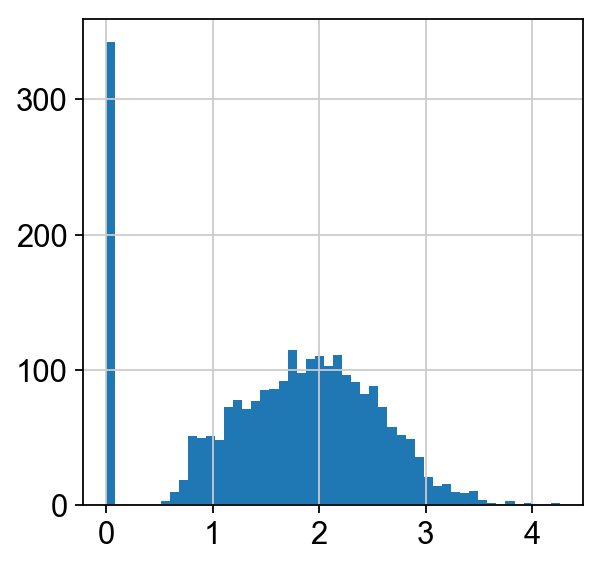

In [40]:
pl.hist(adata_ep_all[:, 'Syt13'].to_df().values,bins=50);

#### Fig. 2c,g - violin plots selected genes

In [41]:
genes = ['Syt13', 'Pax4', 'Nkx6-1', 'Nkx2-2', 'Gck']

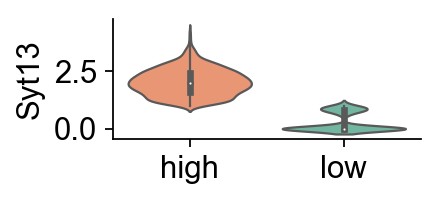

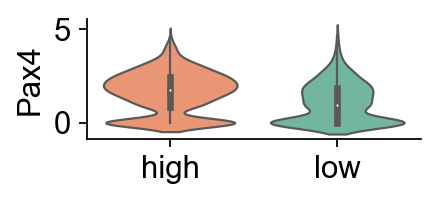

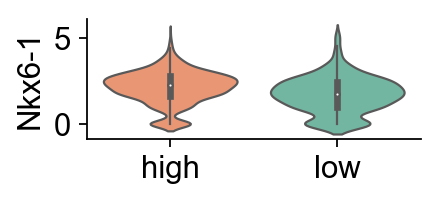

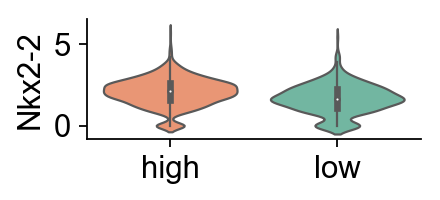

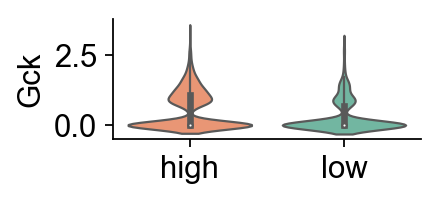

In [44]:
df = adata_ep_all[:, genes].to_df()
df['Syt13_gate'] = adata_ep_all.obs[['Syt13_gate']].copy()
for gene in genes:
    fig,ax = pl.subplots(figsize=(3, 1.5))
    ax=sns.violinplot(x='Syt13_gate', y=gene, palette=['#fc8d62', '#66c2a5'], data=df, inner='box', linewidth=1, scale='width', legend=False)
    
    pl.xticks(rotation=0)
    pl.xlabel('')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    filename='./figures/Fig2_violin_EP_'+gene+'.pdf'
    pl.tight_layout()
    #pl.savefig(filename, dpi=300, format='pdf')
    pl.show()
    pl.close()

#### Fig. 2d - cell state frequencies

In [45]:
df = adata_ep_all[adata_ep_all.obs.clusters_fig3_final.isin(['Ngn3 high EP'])].obs[['clusters_fig3_final', 'day', 'Syt13_gate']].copy()

In [46]:
d = df.groupby(('day', 'Syt13_gate')).size() / df.groupby(('day')).size() * 100

/Users/stritschler/code/miniconda3/envs/scanpy_14/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [47]:
d.reset_index()

day Syt13_gate          0
0  12.5       high  65.777778
1  12.5        low  34.222222
2  13.5       high  74.290780
3  13.5        low  25.709220
4  14.5       high  82.929104
5  14.5        low  17.070896
6  15.5       high  83.333333
7  15.5        low  16.666667

In [48]:
#d.reset_index().to_excel(writer, sheet_name='EPhigh')

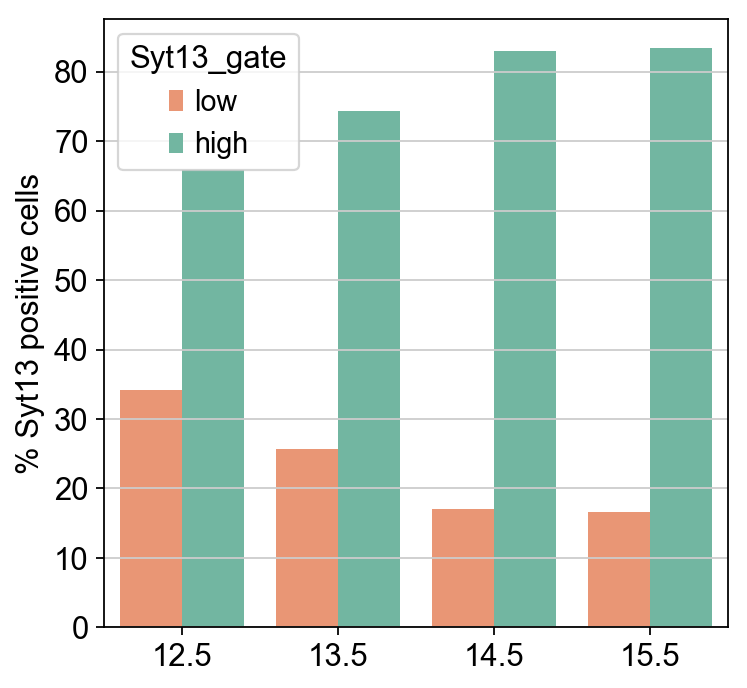

In [51]:
fig,ax = pl.subplots(figsize=(5,5))
ax = sns.barplot(x='day', y=0, hue='Syt13_gate', data=d.reset_index(), hue_order=['low', 'high'],
                    palette=['#fc8d62', '#66c2a5'])

pl.xlabel('')
pl.ylabel('% Syt13 positive cells')
pl.xticks(rotation=0)

filename='./figures/Fig_2d.pdf'
pl.savefig(filename, dpi=300, format='pdf')

pl.show()

#### differential expression and pathway enrichment

In [52]:
import gseapy as gp
# create excel
writer = pd.ExcelWriter('./EP_syt13_top300_genes_1.xlsx', engine='xlsxwriter')

# reorder categorical
adata_ep_all.obs['Syt13_gate']=adata_ep_all.obs['Syt13_gate'].cat.reorder_categories(['low', 'high'])

# exlcude lowly expressed genes
adata_test = adata_ep_all.copy()
sc.pp.filter_genes(adata_test, min_cells=20)
# t-test - get top 300 genes
sc.tl.rank_genes_groups(adata_test, groupby='Syt13_gate', method='t-test', n_genes=300)

# save test results
group='low'
names = adata_test.uns['rank_genes_groups']['names'][group]
scores = adata_test.uns['rank_genes_groups']['scores'][group]
lfc = adata_test.uns['rank_genes_groups']['logfoldchanges'][group]
p = adata_test.uns['rank_genes_groups']['pvals'][group]
p_adj = adata_test.uns['rank_genes_groups']['pvals_adj'][group]
pd.DataFrame({'Names':names, 'Scores':scores,'log foldchange':lfc,'p-value':p,'adjusted p-value':p_adj}).to_excel(writer, sheet_name='Syt13_low_genes')

group='high'
names = adata_test.uns['rank_genes_groups']['names'][group]
scores = adata_test.uns['rank_genes_groups']['scores'][group]
lfc = adata_test.uns['rank_genes_groups']['logfoldchanges'][group]
p = adata_test.uns['rank_genes_groups']['pvals'][group]
p_adj = adata_test.uns['rank_genes_groups']['pvals_adj'][group]
pd.DataFrame({'Names':names, 'Scores':scores,'log foldchange':lfc,'p-value':p,'adjusted p-value':p_adj}).to_excel(writer, sheet_name='Syt13_high_genes')


# perform and save pathway enrichment
gp.enrichr(gene_list=list(adata_test.uns['rank_genes_groups']['names']['low']),
           description='', 
           gene_sets='GO_Biological_Process_2018', 
           cutoff=0.05
          ).res2d.set_index('Term').to_excel(writer,sheet_name='Syt13_low_GO')
gp.enrichr(gene_list=list(adata_test.uns['rank_genes_groups']['names']['high']),
           description='',
           gene_sets='GO_Biological_Process_2018', 
           cutoff=0.05
          ).res2d.set_index('Term').to_excel(writer,sheet_name='Syt13_high_GO')

# save excel
writer.save()

#### Fig 2e - top differential expressed genes

In [53]:
low_genes = pd.read_excel('EP_syt13_top300_genes_1.xlsx', sheet_name='Syt13_low_genes')['Names'][0:21]

In [54]:
high_genes = pd.read_excel('EP_syt13_top300_genes_1.xlsx', sheet_name='Syt13_high_genes')['Names'][0:21]

... storing 'Syt13_gate' as categorical


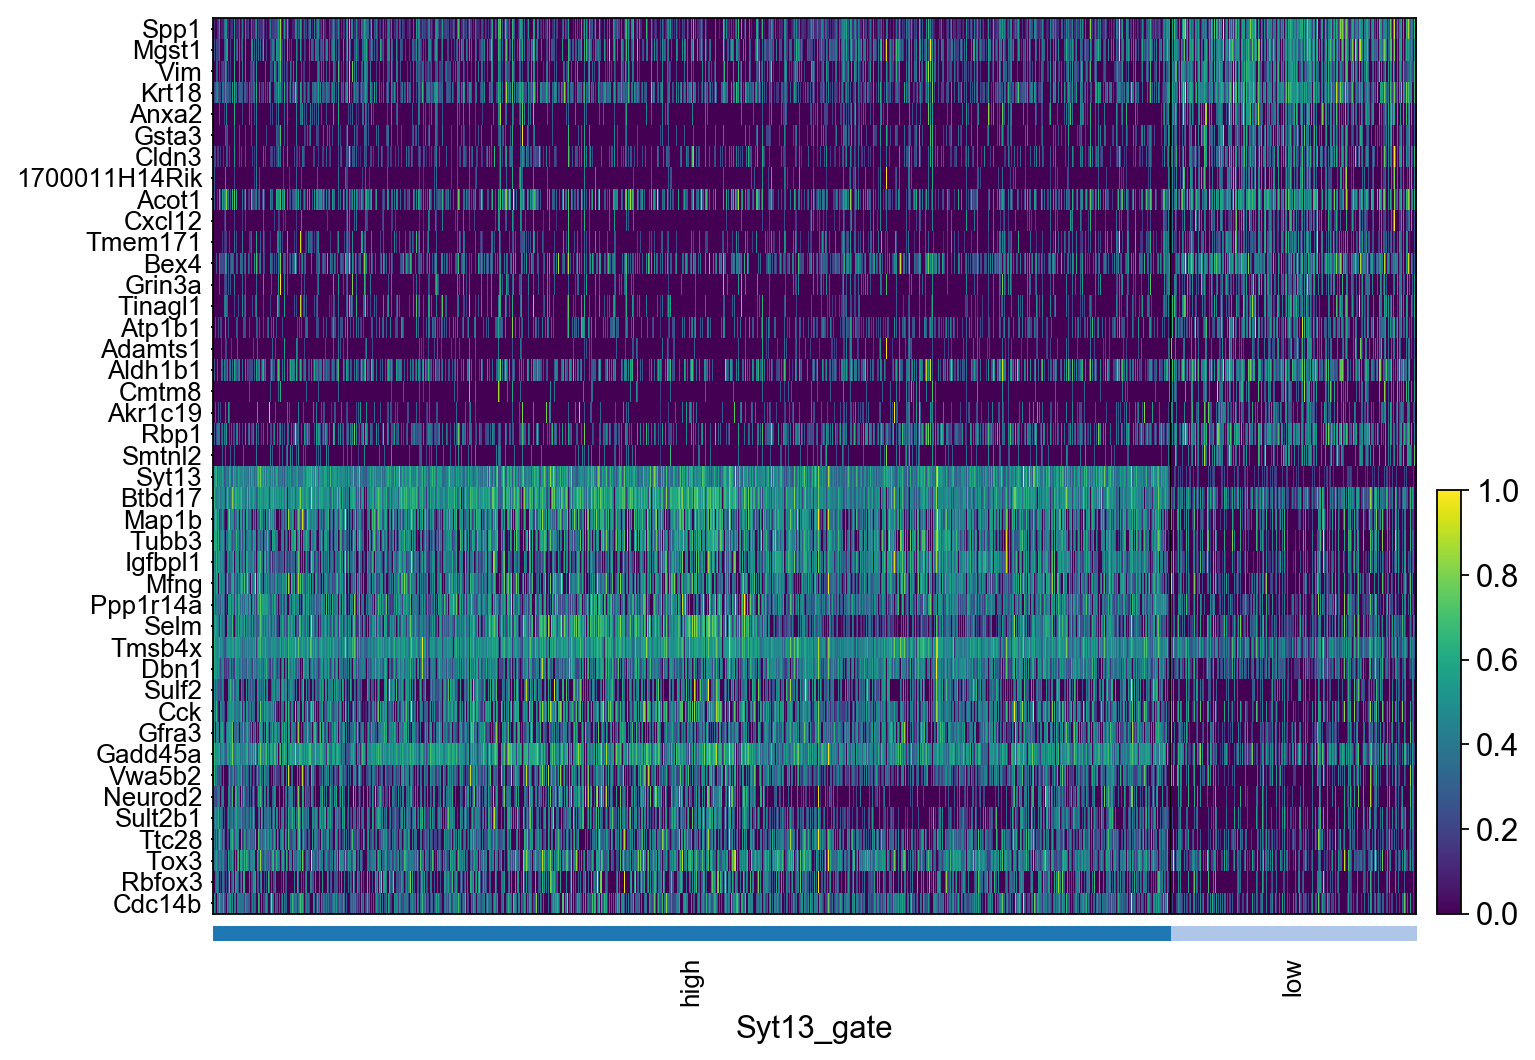

GridSpec(3, 3, height_ratios=[0, 7.56, 0.13], width_ratios=[10, 0, 0.2])

In [55]:
sc.pl.heatmap(adata_ep_all, groupby='Syt13_gate', var_names=low_genes.append(high_genes), 
              swap_axes=True, save='_Fig_2e.pdf', standard_scale='var')

#### Fig 2f - EP signature genes

In [56]:
# list of EP signature genes from Bastidas-Ponce, Tritschler et al.
sig_genes=['Sult2b1', 'Lrrn2', 'Grin3a', 'Nfix', 'Shf', 'Gm8773', 'Plk3', 'Dll1', 'Neurod2', 'Notum', 'Krtap17-1', 'Slc39a2', 
           'C2cd4c', 'Megf11', 'Rbfox3', 'Gng13', 'Steap1', 'Enc1', 'Rab15', 'Rgs16', 'Tbc1d9', 'Lynx1', 'Epb42', 'Nptx2', 
           'Upk3bl', 'Cer1', 'Eya2', 'Rsad2', 'Iffo2', 'Slco4a1', 'Slc16a5', 'Spink4', 'Nptx1', 'Pou3f1', 'Tspear', 'Mycl', 
           'Ttyh2', 'Rasgrp3', 'Dab1', 'Rgs3', 'Sema3g', 'Rhbg', 'Adamtsl2', 'Crybb1', 'Cldn12', 'Tbc1d8', 'Lgi3', 'Tff3', 
           'Obscn', 'Dpysl5', 'Sftpc', 'Miat', 'Vldlr', 'Calml4', 'Kif26a', 'Cd40']

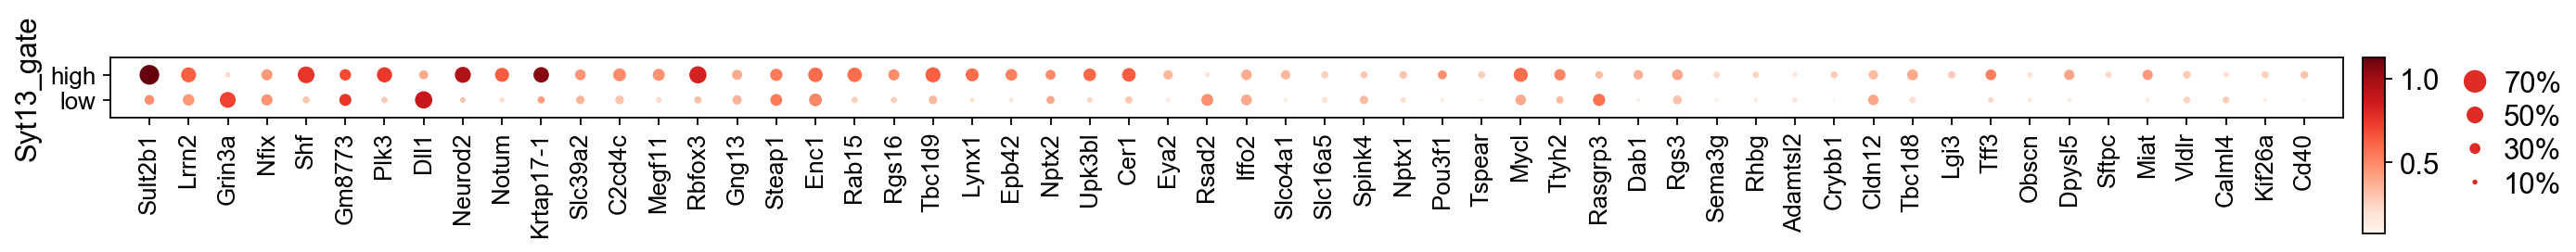

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[19.599999999999998, 0, 0.2, 0.5, 0.25])

In [57]:
sc.pl.dotplot(adata_ep_all, groupby='Syt13_gate', var_names=sig_genes)

In [58]:
# selected signature genes
genes = ['Grin3a', 'Dll1', 'Rsad2', 'Rasgrp3', 'Gm8773',  'Cldn12', 'Krtap17-1', 
         'Rbfox3', 'C2cd4c', 'Rab15', 'Rgs16', 'Tbc1d9',  'Mycl', 'Miat', 'Eya2', 
         'Epb42', 'Lynx1', 'Shf', 'Cer1', 'Upk3bl', 'Sult2b1', 'Neurod2']

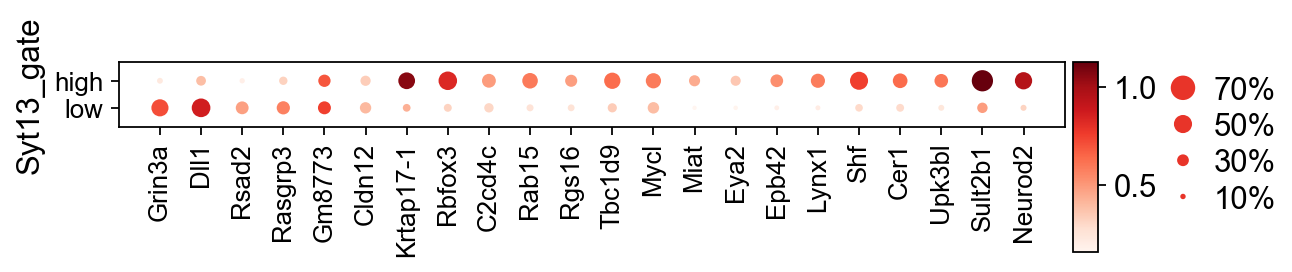

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[7.699999999999999, 0, 0.2, 0.5, 0.25])

In [59]:
sc.pl.dotplot(adata_ep_all, groupby='Syt13_gate', var_names=genes, save='_Fig_2f.pdf')

#### Fig. S8 - violin plots selected genes

In [60]:
genes = ['Tuba4a', 'Tuba11', 'Tubb3']

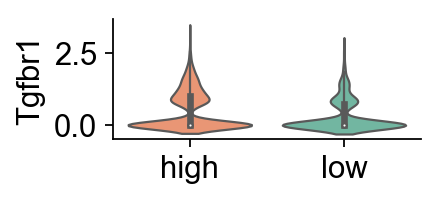

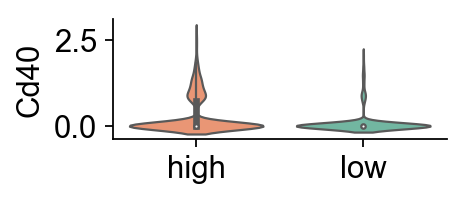

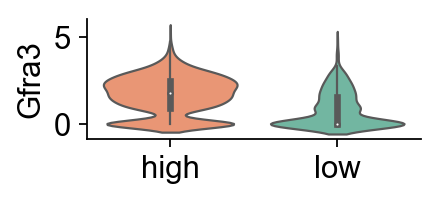

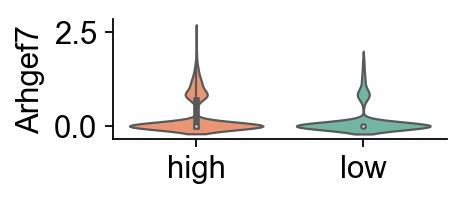

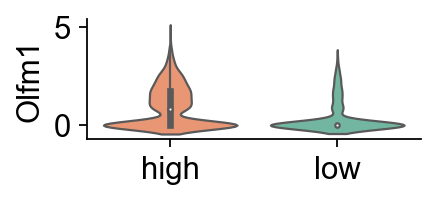

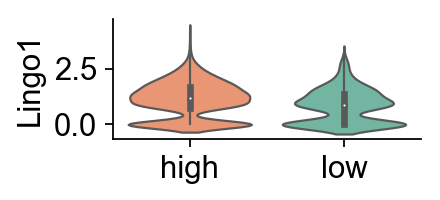

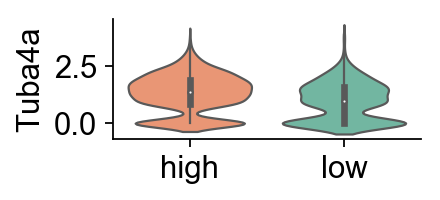

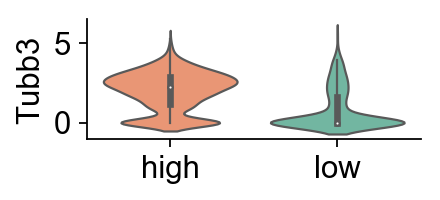

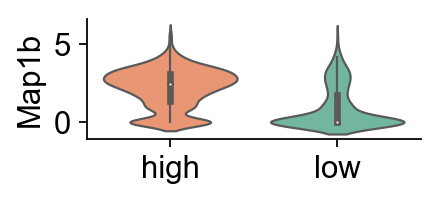

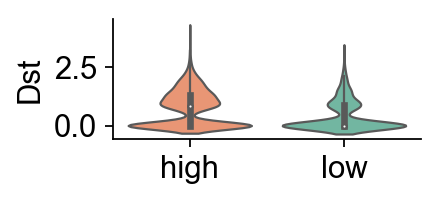

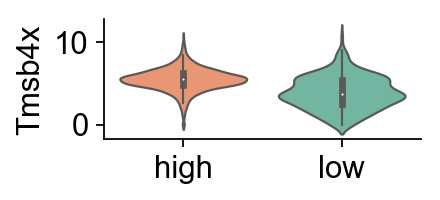

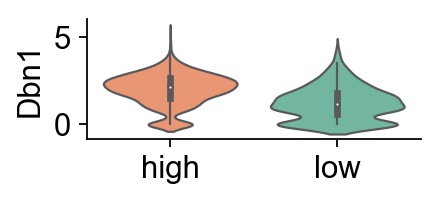

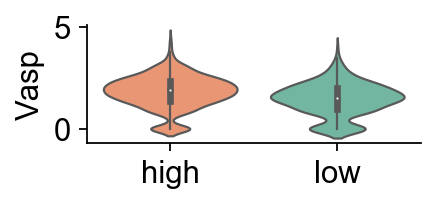

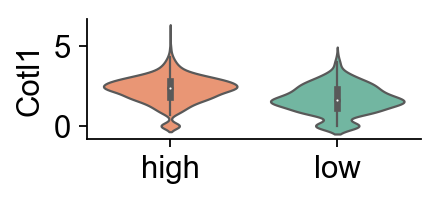

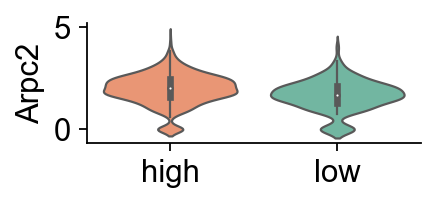

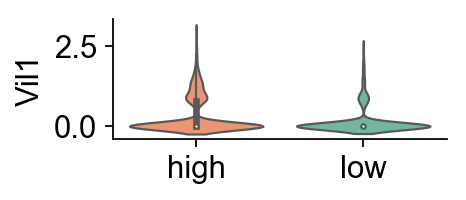

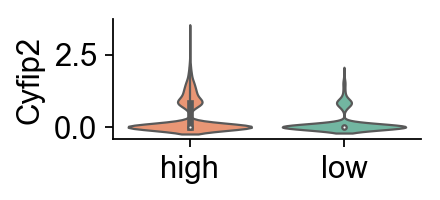

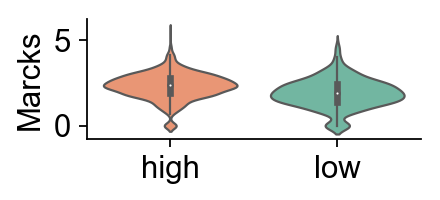

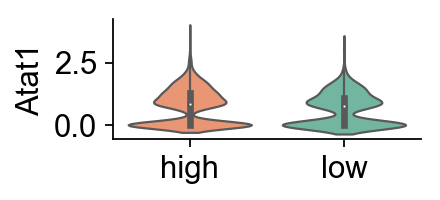

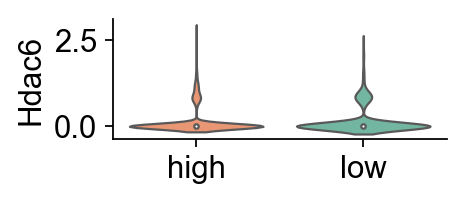

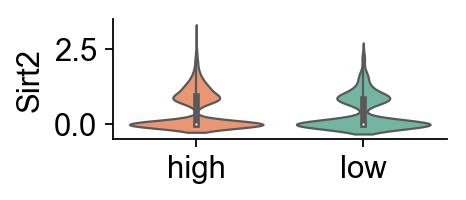

In [61]:
df = adata_ep_all[:, genes].to_df()
df['Syt13_gate'] = adata_ep_all.obs[['Syt13_gate']].copy()
for gene in genes:
    fig,ax = pl.subplots(figsize=(3, 1.5))
    
    ax=sns.violinplot(x='Syt13_gate', y=gene, palette=['#fc8d62', '#66c2a5'], data=df, inner='box', linewidth=1, scale='width', legend=False)
    
    pl.xticks(rotation=0)
    pl.xlabel('')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    filename='./figures/_violin_EP_'+gene+'.pdf'
    pl.tight_layout()
    #pl.savefig(filename,dpi=300,format='pdf')
    pl.show()
    pl.close()

## FEV+ cells

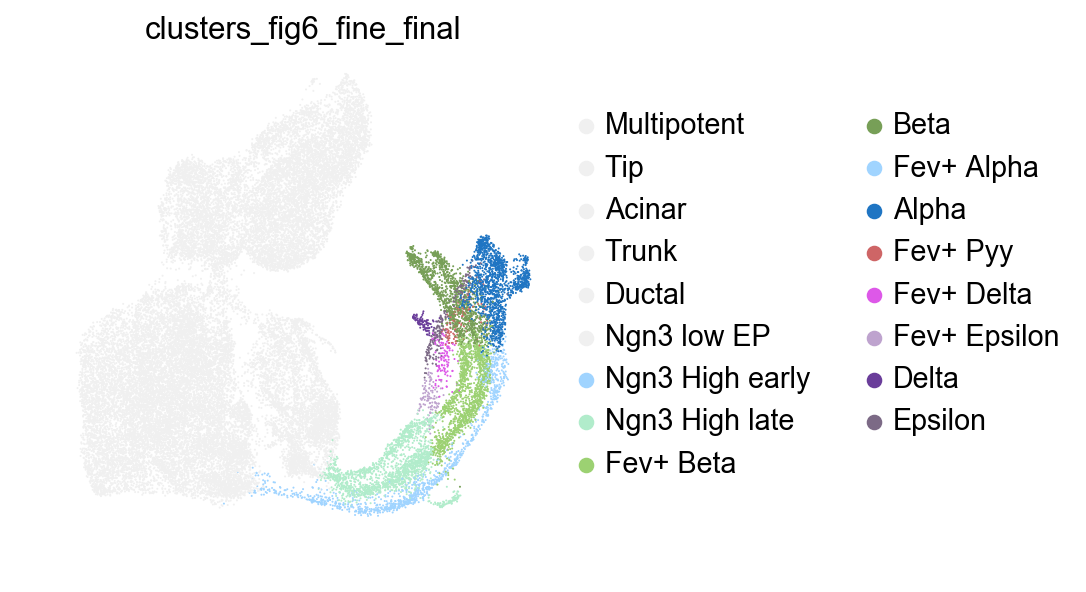

In [62]:
sc.pl.umap(adata, color=['clusters_fig6_fine_final'], wspace=0.4,frameon=False)

### Syt13 FEV+ cells - manifold and Syt13 gate

In [63]:
adata_fev_all = adata[np.isin(adata.obs['clusters_fig3_final'], ['Fev+'])].copy()

In [65]:
adata_fev_all.obs['Syt13_gate'] = ['low' if k<=1 else 'high' for k in adata_fev_all[:,'Syt13'].X.copy()]

/Users/stritschler/code/miniconda3/envs/scanpy_14/lib/python3.6/site-packages/scipy/sparse/compressed.py:287: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using <= is inefficient, try using > instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


#### Fig 2h - Syt13 expression

... storing 'Syt13_gate' as categorical


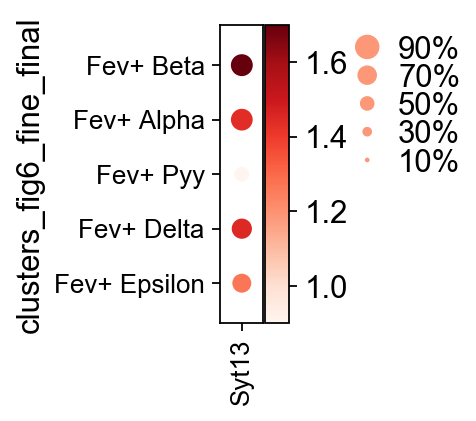

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.35, 0, 0.2, 0.5, 0.25])

In [66]:
sc.pl.dotplot(adata_fev_all, groupby='clusters_fig6_fine_final', var_names=['Syt13'], save='_Fig_2g.pdf')

#### Fig. 2i - cell state frequencies

In [67]:
df = adata_fev_all.obs[['Syt13_gate', 'clusters_fig6_fine_final']].copy()

In [68]:
d = df.groupby(('clusters_fig6_fine_final', 'Syt13_gate')).size() / df.groupby('clusters_fig6_fine_final').size() *100

/Users/stritschler/code/miniconda3/envs/scanpy_14/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [69]:
d.reset_index()

clusters_fig6_fine_final Syt13_gate          0
0                Fev+ Beta       high  81.898455
1                Fev+ Beta        low  18.101545
2               Fev+ Alpha       high  71.304348
3               Fev+ Alpha        low  28.695652
4                 Fev+ Pyy       high  46.969697
5                 Fev+ Pyy        low  53.030303
6               Fev+ Delta       high  74.545455
7               Fev+ Delta        low  25.454545
8             Fev+ Epsilon       high  63.392857
9             Fev+ Epsilon        low  36.607143

In [74]:
#d.reset_index().to_excel(writer, sheet_name='FEV')

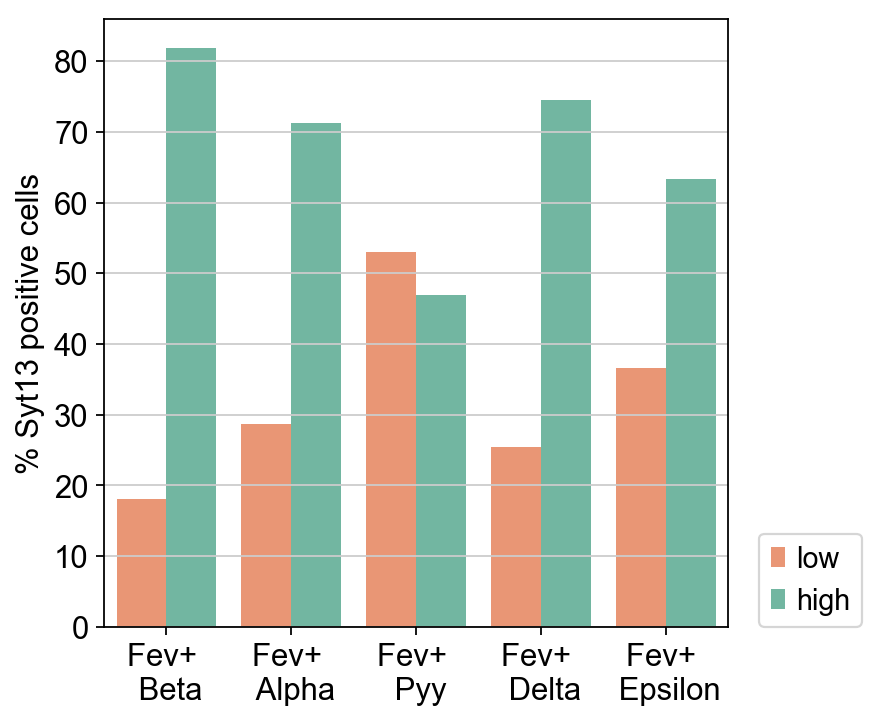

In [70]:
fig,ax = pl.subplots(figsize=(5,5))
ax = sns.barplot(x='clusters_fig6_fine_final', y=0, hue='Syt13_gate', data=d.reset_index(), palette=['#fc8d62', '#66c2a5'], hue_order=['low', 'high'])

pl.xlabel('')
pl.ylabel('% Syt13 positive cells')
ax.set_xticklabels(['Fev+ \n Beta', 'Fev+ \n Alpha', 'Fev+ \n Pyy', 'Fev+ \n Delta', 'Fev+ \n Epsilon'])
ax.legend(loc=(1.05,0))
pl.xticks(rotation=0)

filename='./figures/Fig_2i.pdf'
pl.savefig(filename, dpi=300, format='pdf')

pl.show()

#### Fig. 2j - violin plots selected genes

In [71]:
genes = ['Syt13', 'Pax4', 'Pcsk2', 'Arx', 'Isl1', 'Pou3f4']

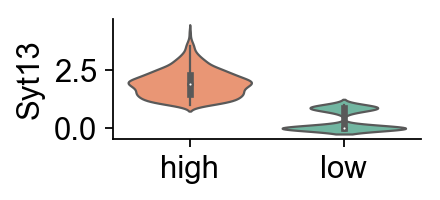

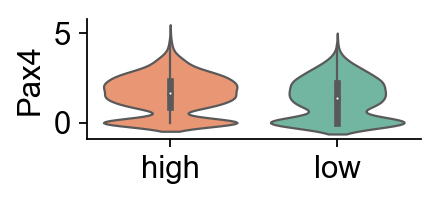

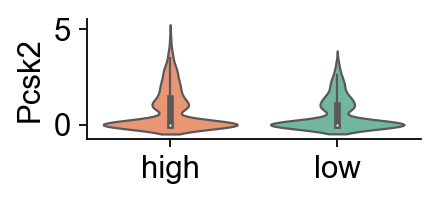

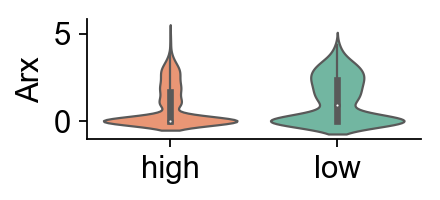

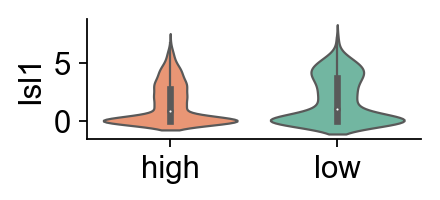

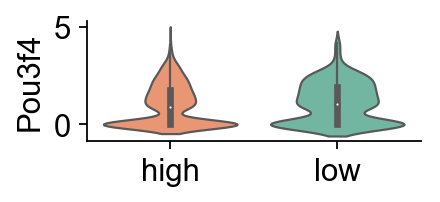

In [72]:
df = adata_fev_all[:, genes].to_df()
df['Syt13_gate'] = adata_fev_all.obs[['Syt13_gate']].copy()
for gene in genes:
    fig,ax = pl.subplots(figsize=(3, 1.5))
    
    ax=sns.violinplot(x='Syt13_gate', y=gene, palette=['#fc8d62', '#66c2a5'], data=df, inner='box', linewidth=1, scale='width', legend=False)
    
    pl.xticks(rotation=0)
    pl.xlabel('')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    filename='./figures/Fig2_violin_FEV_'+gene+'.pdf'
    pl.tight_layout()
    #pl.savefig(filename,dpi=300,format='pdf')
    pl.show()
    pl.close()

#### differential expression and pathway enrichment

In [73]:
import gseapy as gp
# create excel
writer = pd.ExcelWriter('./FEV_syt13_top300_genes_1.xlsx', engine='xlsxwriter')

# reorder categorical
adata_fev_all.obs['Syt13_gate']=adata_fev_all.obs['Syt13_gate'].cat.reorder_categories(['low', 'high'])

# exlcude lowly expressed genes
adata_test = adata_fev_all.copy()
sc.pp.filter_genes(adata_test, min_cells=20)
# t-test - get top 300 genes
sc.tl.rank_genes_groups(adata_test, groupby='Syt13_gate', method='t-test', n_genes=300)

# save test results
group='low'
names = adata_test.uns['rank_genes_groups']['names'][group]
scores = adata_test.uns['rank_genes_groups']['scores'][group]
lfc = adata_test.uns['rank_genes_groups']['logfoldchanges'][group]
p = adata_test.uns['rank_genes_groups']['pvals'][group]
p_adj = adata_test.uns['rank_genes_groups']['pvals_adj'][group]
pd.DataFrame({'Names':names, 'Scores':scores,'log foldchange':lfc,'p-value':p,'adjusted p-value':p_adj}).to_excel(writer, sheet_name='Syt13_low_genes')

group='high'
names = adata_test.uns['rank_genes_groups']['names'][group]
scores = adata_test.uns['rank_genes_groups']['scores'][group]
lfc = adata_test.uns['rank_genes_groups']['logfoldchanges'][group]
p = adata_test.uns['rank_genes_groups']['pvals'][group]
p_adj = adata_test.uns['rank_genes_groups']['pvals_adj'][group]
pd.DataFrame({'Names':names, 'Scores':scores,'log foldchange':lfc,'p-value':p,'adjusted p-value':p_adj}).to_excel(writer, sheet_name='Syt13_high_genes')


# perform and save pathway enrichment
gp.enrichr(gene_list=list(adata_test.uns['rank_genes_groups']['names']['low']),
           description='', 
           gene_sets='GO_Biological_Process_2018', 
           cutoff=0.05
          ).res2d.set_index('Term').to_excel(writer,sheet_name='Syt13_low_GO')
gp.enrichr(gene_list=list(adata_test.uns['rank_genes_groups']['names']['high']),
           description='',
           gene_sets='GO_Biological_Process_2018', 
           cutoff=0.05
          ).res2d.set_index('Term').to_excel(writer,sheet_name='Syt13_high_GO')

# save excel
writer.save()

#### Fig S4a - top differential expressed genes

In [74]:
high_genes = pd.read_excel('./FEV_syt13_top300_genes_1.xlsx', sheet_name='Syt13_high_genes')['Names'][0:21]
low_genes = pd.read_excel('./FEV_syt13_top300_genes_1.xlsx', sheet_name='Syt13_low_genes')['Names'][0:21]

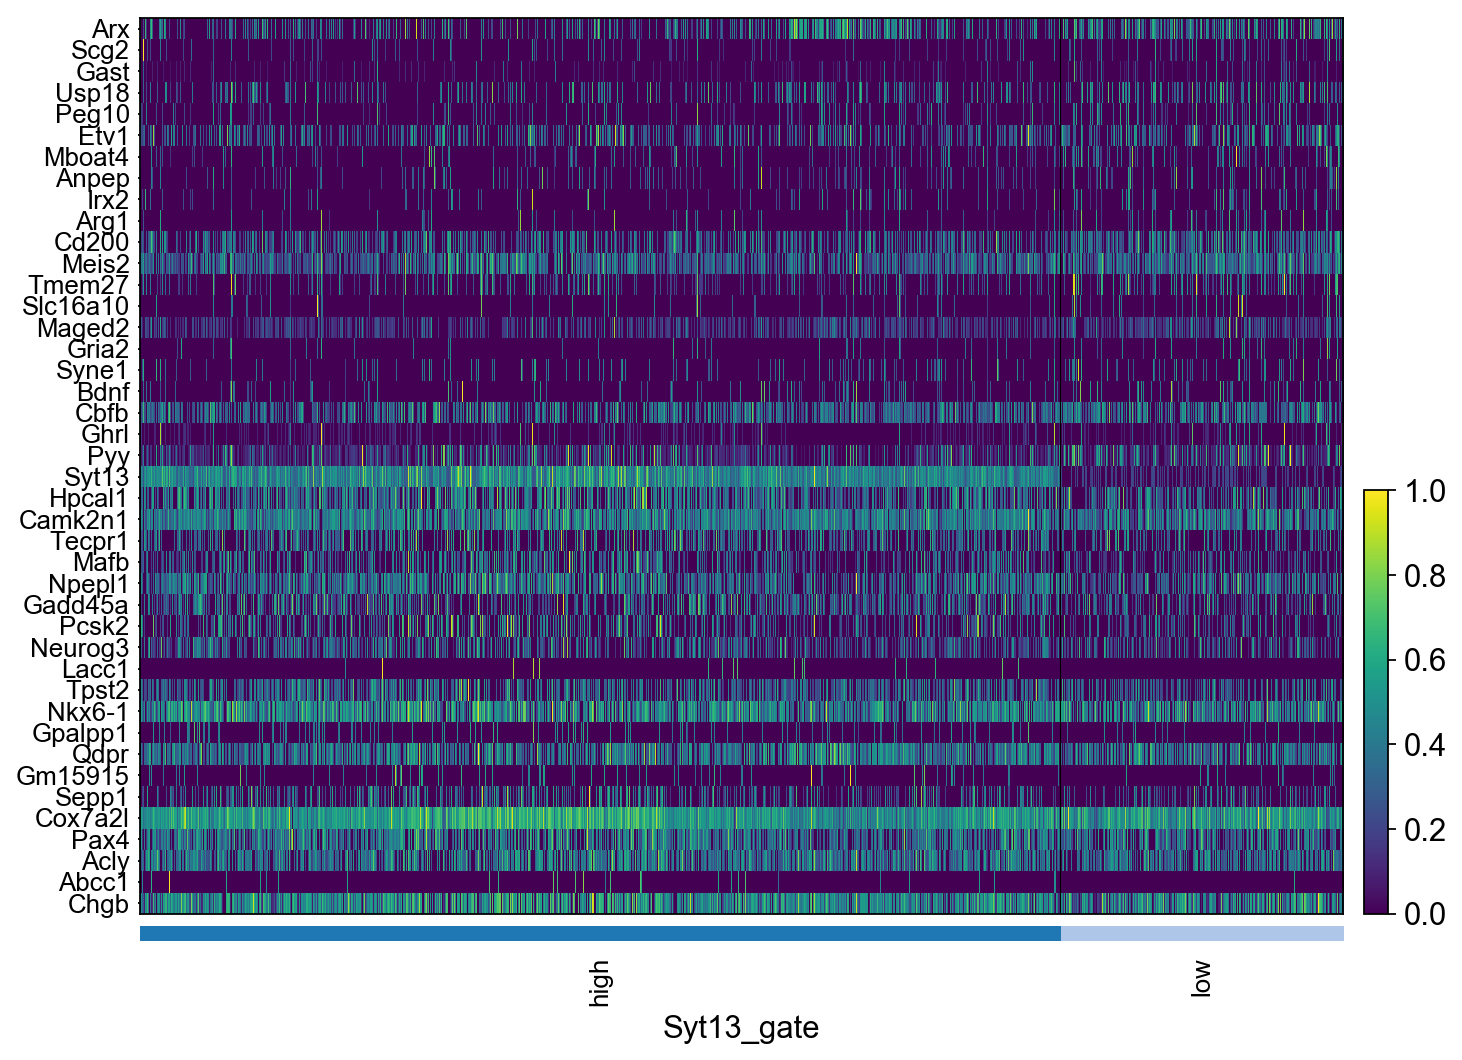

GridSpec(3, 3, height_ratios=[0, 7.56, 0.13], width_ratios=[10, 0, 0.2])

In [75]:
sc.pl.heatmap(adata_fev_all, groupby='Syt13_gate', var_names=low_genes.append(high_genes), swap_axes=True, save='_Fig_S3a.pdf', standard_scale='var')

## Figure 2 - endocrine cells

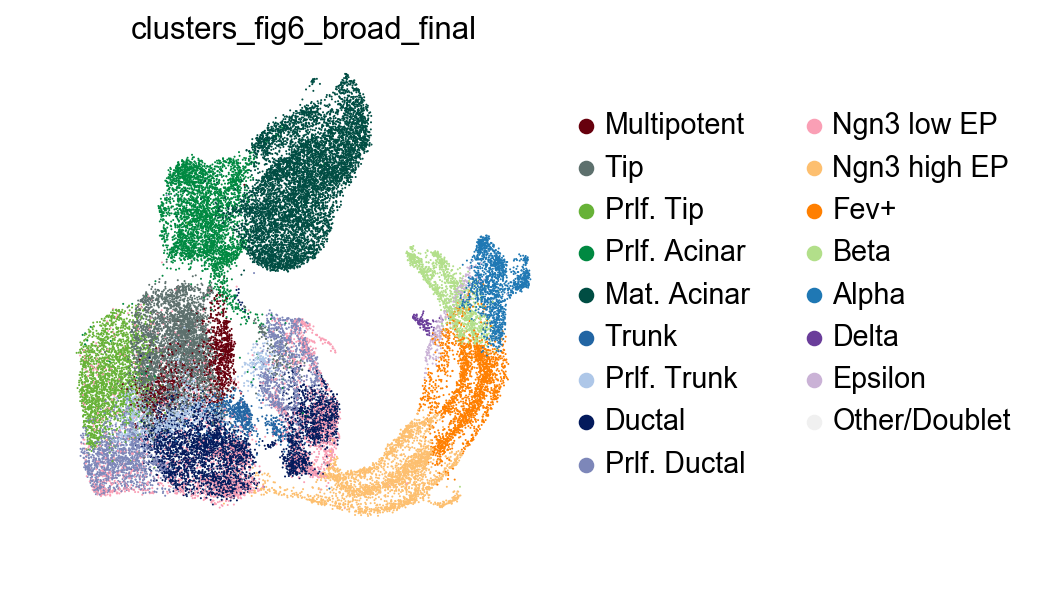

In [10]:
sc.pl.umap(adata, color=['clusters_fig6_broad_final'], wspace=0.4,frameon=False)

In [78]:
adata_sub = adata[np.isin(adata.obs['clusters_fig2_final'],['Endocrine'])].copy()

In [79]:
adata_sub.obs['Syt13_gate'] = ['low' if k<=1 else 'high' for k in adata_sub[:,'Syt13'].X.copy()]

/Users/stritschler/code/miniconda3/envs/scanpy_14/lib/python3.6/site-packages/scipy/sparse/compressed.py:287: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using <= is inefficient, try using > instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


#### Fig. 2k - cell state frequencies

In [80]:
df = adata_sub.obs[['Syt13_gate', 'clusters_fig6_broad_final']].copy()

In [81]:
d = df.groupby(('clusters_fig6_broad_final', 'Syt13_gate')).size() / df.groupby('clusters_fig6_broad_final').size() *100

/Users/stritschler/code/miniconda3/envs/scanpy_14/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [82]:
d.reset_index()

clusters_fig6_broad_final Syt13_gate          0
0                      Beta       high  91.996766
1                      Beta        low   8.003234
2                     Alpha       high  67.577031
3                     Alpha        low  32.422969
4                     Delta       high  71.844660
5                     Delta        low  28.155340
6                   Epsilon       high  40.259740
7                   Epsilon        low  59.740260

In [87]:
#d.reset_index().to_excel(writer, sheet_name='endocrine')

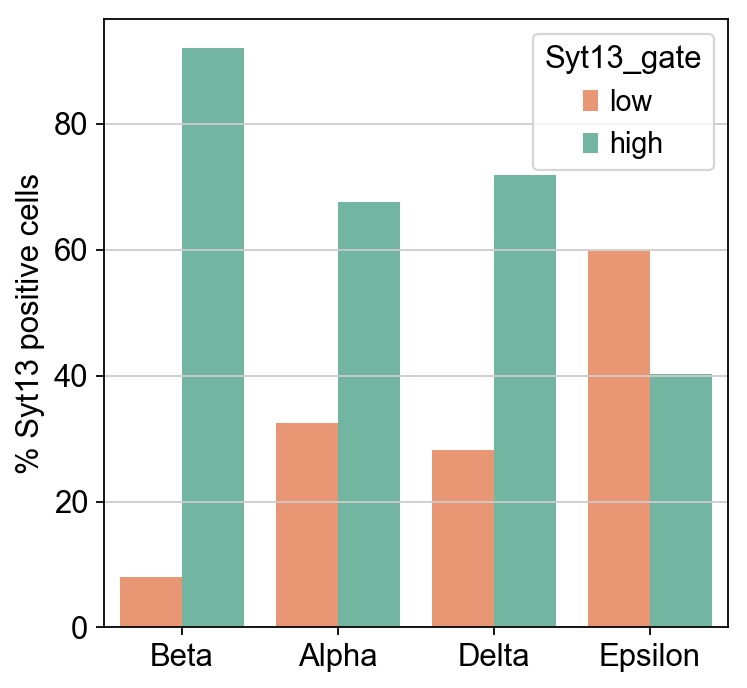

In [83]:
fig,ax = pl.subplots(figsize=(5,5))
ax = sns.barplot(x='clusters_fig6_broad_final', y=0, hue='Syt13_gate', data=d.reset_index(), palette=['#fc8d62', '#66c2a5'], hue_order=['low', 'high'])

pl.xlabel('')
pl.ylabel('% Syt13 positive cells')
#ax.set_xticklabels(['Fev+ \n Beta', 'Fev+ \n Alpha', 'Fev+ \n Pyy', 'Fev+ \n Delta', 'Fev+ \n Epsilon'])
pl.xticks(rotation=0)

filename='./figures/Fig_2k.pdf'
pl.savefig(filename,dpi=600,format='pdf')
pl.show()

## Figure S4 - PAGA and lineage relations

In [84]:
adata_sub_all = adata[np.isin(adata.obs['clusters_fig3_final'],['Ngn3 high EP', 'Fev+', 'Endocrine'])].copy()
adata_sub_all.obs['Syt13_gate'] = ['low' if k<=1 else 'high' for k in adata_sub_all[:,'Syt13'].X.copy()]

/Users/stritschler/code/miniconda3/envs/scanpy_14/lib/python3.6/site-packages/scipy/sparse/compressed.py:287: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using <= is inefficient, try using > instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


In [92]:
adata_sub_all.obs['paga_clusters'] = ['Ngn3 high EP-Syt13 '+b if a in ['Ngn3 high EP'] else 'Fev+-Syt13 '+b if a in ['Fev+']
                                      else a for a,b in zip (adata_sub_all.obs['clusters_fig6_broad_final'], adata_sub_all.obs['Syt13_gate'])]

... storing 'paga_clusters' as categorical


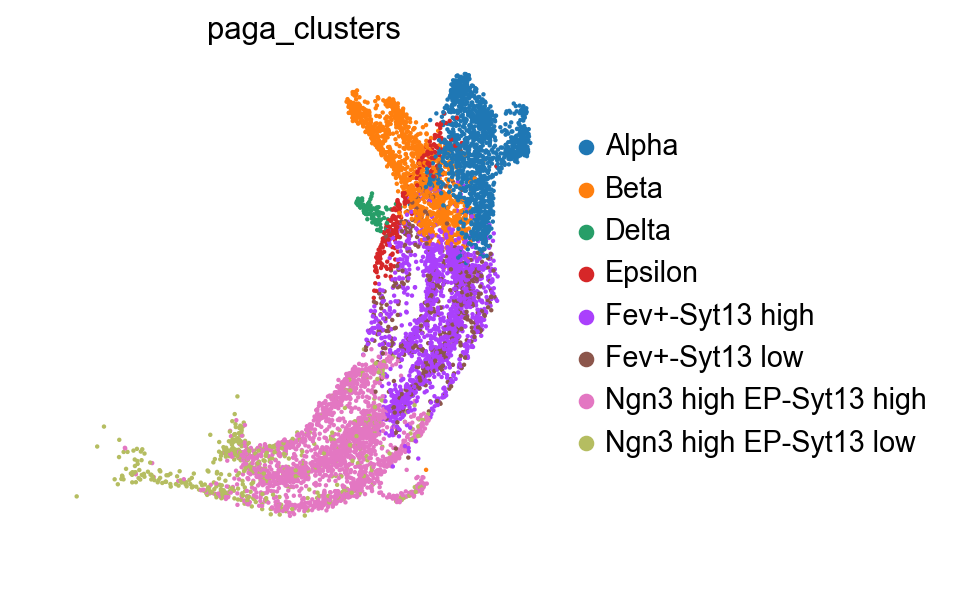

In [93]:
sc.pl.umap(adata_sub_all, color='paga_clusters')

In [94]:
# recompute manifold
# some weird bug 
adata_sub_paga=sc.AnnData(adata_sub_all.X)
adata_sub_paga.obs_names=adata_sub_all.obs_names
adata_sub_paga.obs=adata_sub_all.obs
adata_sub_paga.var_names=adata_sub_all.var_names

sc.pp.highly_variable_genes(adata_sub_paga)
sc.pp.pca(adata_sub_paga)
sc.pp.neighbors(adata_sub_paga)
sc.tl.paga(adata_sub_paga, groups='paga_clusters')

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:01)
running PAGA
    finished (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


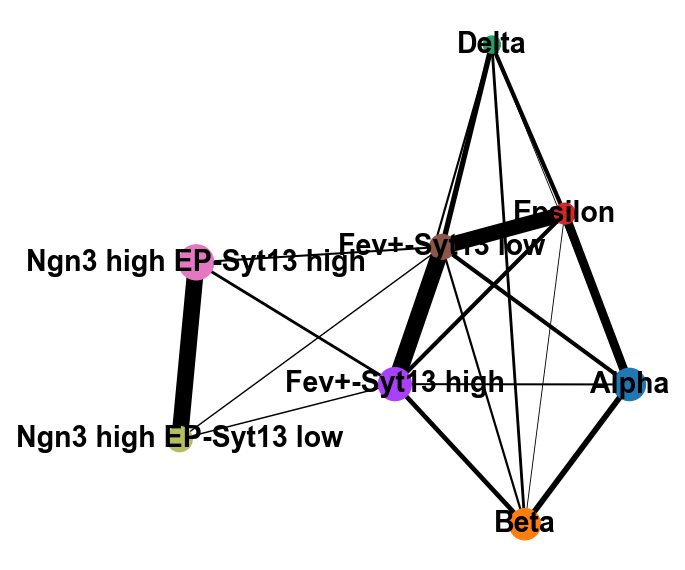

In [95]:
sc.set_figure_params(frameon=False)
sc.pl.paga(adata_sub_paga)

In [96]:
adata_sub_all.obs['paga_clusters'] = adata_sub_all.obs['paga_clusters'].cat.reorder_categories(
    ['Ngn3 high EP-Syt13 low', 'Ngn3 high EP-Syt13 high', 'Fev+-Syt13 low', 'Fev+-Syt13 high', 'Beta', 'Alpha', 'Delta', 'Epsilon']
)

In [97]:
## manually set positions for PAGA graph
pos=np.array([ 
       [ 7, -0.5 ],
       [ 7, 0.5],
       [ 9, -1],
       [9,  1 ],
       [11 ,  1],
       [ 11, -1],
       [ 11,  0.5],
       [ 11,  -0.5]])

## reset color palette
adata_sub_paga.uns['paga_clusters_colors']=[
       '#fc8d62',                                         
       '#66c2a5',
       '#CE6566',
       '#238443',
       '#b2df8a', 
       '#1f78b4', 
       '#6a3d9a', 
       '#cab2d6']

running PAGA
    finished (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


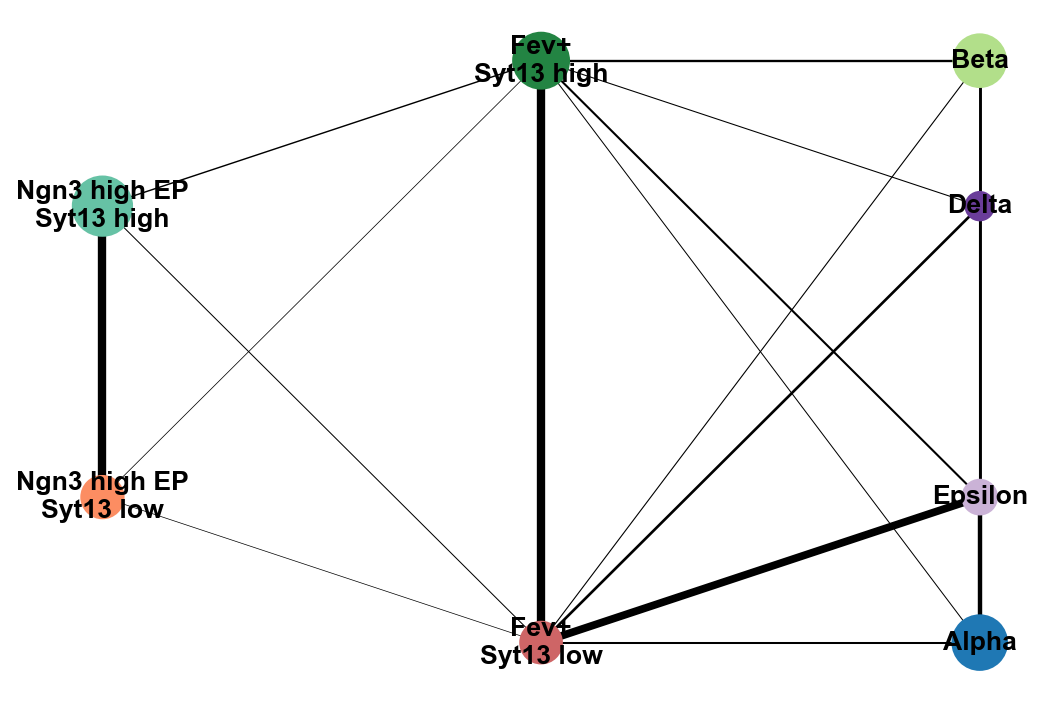

In [98]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (7,5)
sc.tl.paga(adata_sub_paga, groups='paga_clusters')
sc.pl.paga(adata_sub_paga, edge_width_scale=0.5, fontsize=12, threshold=0.05, pos=pos, frameon=False, node_size_scale=3,
           labels=[['Ngn3 high EP\nSyt13 low', 'Ngn3 high EP\nSyt13 high', 'Fev+\nSyt13 low',  
                   'Fev+\nSyt13 high', 'Beta', 'Alpha', 'Delta', 'Epsilon']], save='_Fig_S3b.pdf'
           )